In [1]:
import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
import datetime
import numpy as np 
from matplotlib import style
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import os
import io
%matplotlib inline

#os.chdir('D:/Scholastic/Projects/COVID-19_Jobs_Paper/LSTM_Predictor')

In [2]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [3]:
from google.colab import files
uploaded = files.upload()

new_df2 = pd.read_csv(io.BytesIO(uploaded['Monthly_Unemployment_1991-2020.csv']))
new_df2.head()

Saving Monthly_Unemployment_1991-2020.csv to Monthly_Unemployment_1991-2020.csv


,ds,y
0,31-12-1991,5.450000
1,31-01-1992,5.454167
2,29-02-1992,5.458333
3,31-03-1992,5.462500
4,30-04-1992,5.466667


(338, 6, 1)
Epoch 1/25
31/31 [==============================] - 5s 43ms/step - loss: 13.4552 - val_loss: 23.5842
Epoch 2/25
31/31 [==============================] - 0s 10ms/step - loss: 0.7264 - val_loss: 21.3067
Epoch 3/25
31/31 [==============================] - 0s 11ms/step - loss: 0.5560 - val_loss: 21.3556
Epoch 4/25
31/31 [==============================] - 0s 11ms/step - loss: 0.7492 - val_loss: 21.4944
Epoch 5/25
31/31 [==============================] - 0s 10ms/step - loss: 0.4002 - val_loss: 20.1472
Epoch 6/25
31/31 [==============================] - 0s 11ms/step - loss: 0.7913 - val_loss: 20.3149
Epoch 7/25
31/31 [==============================] - 0s 11ms/step - loss: 0.4210 - val_loss: 19.1814
Epoch 8/25
31/31 [==============================] - 0s 11ms/step - loss: 0.5032 - val_loss: 18.6040
Epoch 9/25
31/31 [==============================] - 0s 11ms/step - loss: 0.4977 - val_loss: 19.2921
Epoch 10/25
31/31 [==============================] - 0s 11ms/step - loss: 0.3535 - val_

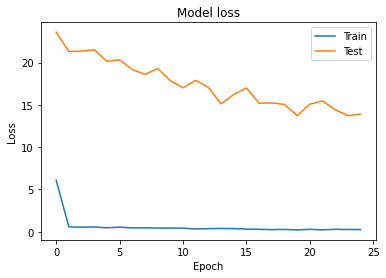

In [4]:
### Model 2
#new_df2 = pd.read_csv('Data/Monthly_Unemployment_1991-2020.csv')
new_df2['ds'] = pd.to_datetime(new_df2['ds'], yearfirst=True)

train_data = new_df2.loc[:,'y'].values
train_data = train_data.reshape(-1,1)

time_steps = 6
X_train, y_train = create_dataset(train_data, time_steps)

# reshape it [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 6, 1))

print(X_train.shape)

# Build the model 
model2 = keras.Sequential()
model2.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units = 100))
model2.add(Dropout(0.2))
# Output layer
model2.add(Dense(units = 1))
# Compiling the model
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the model to the Training set
history = model2.fit(X_train, y_train, epochs = 25, batch_size = 10, validation_split=0.1)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

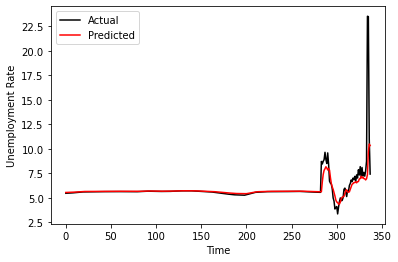

In [5]:
preds_2 = model2.predict(X_train)

plt.plot(y_train, color = 'black', label = 'Actual')
plt.plot(preds_2, color = 'red', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.savefig('Model_2.jpg')


In [7]:
g=X_train[337]   # Taking the last set of 6 terms from the original data
print("original shape")
print(g.shape)
print("Modified shape")
g=np.reshape(g,(1, 6, 1))
g.shape


original shape
(6, 1)
Modified shape


(1, 6, 1)

In [8]:
g

array([[[ 7.22],
        [ 7.76],
        [ 8.75],
        [23.52],
        [23.48],
        [10.99]]])

In [9]:
i=1
future=[]
while i<=17:             # from August 2020 to December 2021 there are 17 months
  t=model2.predict(g)
  future=np.append(future,t)
  g=np.reshape(g,(1,-1))
  g= np.delete(g, 0)
  g=np.append(g,t)
  g=np.reshape(g,(1,6,1))
  i=i+1



In [10]:
print("From AUGUST 2020 to DeECEMBER 2021")
future

From AUGUST 2020 to DeECEMBER 2021


array([10.3375721 ,  9.89447498,  9.14823437,  8.29033279,  7.66887712,
        7.29761362,  6.89868259,  6.58945084,  6.36180115,  6.19247961,
        6.06360912,  5.9687252 ,  5.90286875,  5.8556056 ,  5.82206297,
        5.79864073,  5.78241491])